# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

hejhej karo

Imports and set magics:

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import dataproject
import csv

# Specifying the filename
filename = "DataProject_Data.csv"

with open('DataProject_Data.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)
# autoreload modules when code is run
#%load_ext autoreload
#%autoreload 2
DataProject_Data = pd.read_csv(filename, delimiter=";")

Solowclass = dataproject.Solowclass(filename)

['t;DK_B_t;DK_L_t;DK_K_t ;DK_Q_t ;US_B_t;US_L_t;US_K_t;US_Q_t ;IN_B_t;IN_L_t;IN_K_t ;IN_Q_t ;CN_B_t;CN_L_t;CN_K_t ;CN_Q_t ']
['1960;17203', '33;2111660;2', '66627E+11;75799778713;18524', '19;70956940;1', '46931E+13;3', '51094E+12;1105', '53;179374600;1', '0587E+12;4', '47576E+11;2471', '33;295659330;6', '39094E+11;6', '89786E+11']
['1961;17461', '37995;2123738', '695;2', '83473E+11;78546887065;18802', '05285;71921954', '38;1', '51819E+13;3', '61844E+12;1122', '11295;182836529', '8;1', '17158E+12;4', '78456E+11;2508', '39995;299443769', '4;9', '42305E+11;8', '28053E+11']
['1962;17723', '30065;2135886', '481;3', '00821E+11;81337562942;19084', '08364;72900092', '96;1', '56851E+13;3', '72906E+12;1138', '944644;186365274', '8;1', '29086E+12;5', '10384E+11;2546', '025949;303276649', '7;1', '30017E+12;9', '66072E+11']
['1963;17989', '15016;2148103', '751;3', '18676E+11;84173374003;19370', '3449;73891534', '23;1', '62031E+13;3', '84286E+12;1156', '028814;189962124', '6;1', '41666E+12;5', '4339

Slet mellemrum i data og lav alle variable om til floats i stedet for strings

In [182]:
# Remove trailing whitespaces from column names
DataProject_Data.columns = DataProject_Data.columns.str.strip()

# Convert specific columns to strings before replacing commas
string_columns = ['DK_K_t', 'US_K_t']  # Add other columns if needed
for column in string_columns:
    DataProject_Data[column] = DataProject_Data[column].astype(str)

# Now you can access the columns without trailing whitespaces
DataProject_Data['DK_K_t'] = DataProject_Data['DK_K_t'].str.replace(',', '.')
DataProject_Data['US_K_t'] = DataProject_Data['US_K_t'].str.replace(',', '.')

# Convert strings to floats for specified columns
columns_to_convert = ['DK_B_t', 'US_B_t', 'IN_B_t', 'CN_B_t',
                     'DK_K_t', 'US_K_t', 'IN_K_t', 'CN_K_t',
                     'DK_Q_t', 'US_Q_t', 'IN_Q_t', 'CN_Q_t',
                     'DK_L_t', 'US_L_t', 'IN_L_t', 'CN_L_t']

for column in columns_to_convert:
    DataProject_Data[column] = DataProject_Data[column].str.replace(',', '.').astype(float)


In [183]:
# Check data types
print(DataProject_Data.dtypes)

# Inspect sample data
print(DataProject_Data.head())

# Calculate statistics
print(DataProject_Data.describe())


t           int64
DK_B_t    float64
DK_L_t    float64
DK_K_t    float64
DK_Q_t    float64
US_B_t    float64
US_L_t    float64
US_K_t    float64
US_Q_t    float64
IN_B_t    float64
IN_L_t    float64
IN_K_t    float64
IN_Q_t    float64
CN_B_t    float64
CN_L_t    float64
CN_K_t    float64
CN_Q_t    float64
dtype: object
      t       DK_B_t       DK_L_t        DK_K_t        DK_Q_t       US_B_t  \
0  1960  17203.33000  2111660.000  2.666270e+11  7.579978e+10  18524.19000   
1  1961  17461.37995  2123738.695  2.834730e+11  7.854689e+10  18802.05285   
2  1962  17723.30065  2135886.481  3.008210e+11  8.133756e+10  19084.08364   
3  1963  17989.15016  2148103.751  3.186760e+11  8.417337e+10  19370.34490   
4  1964  18258.98741  2160390.905  3.370440e+11  8.705587e+10  19660.90007   

        US_L_t        US_K_t        US_Q_t       IN_B_t       IN_L_t  \
0  70956940.00  1.469310e+13  3.510940e+12  1105.530000  179374600.0   
1  71921954.38  1.518190e+13  3.618440e+12  1122.112950  182836529.

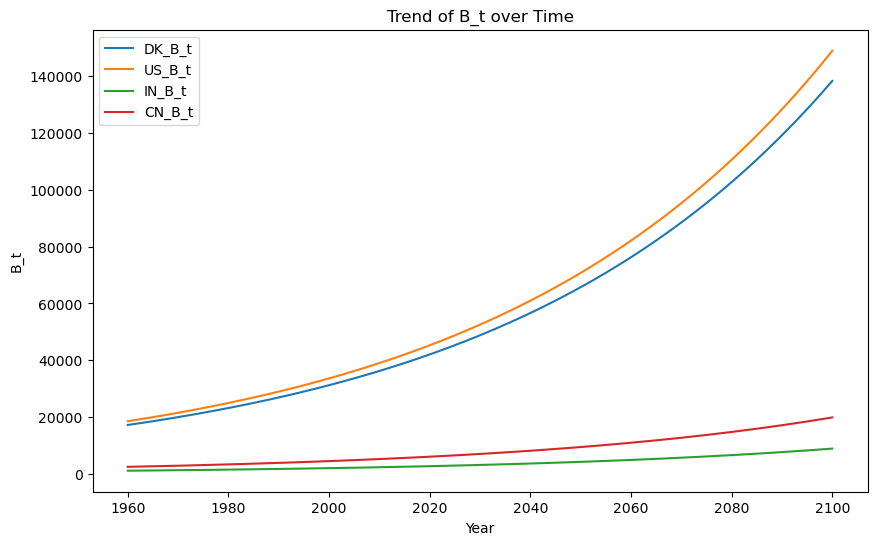

In [184]:
# Plot the data
plt.figure(figsize=(10, 6))

plt.plot(DataProject_Data['t'], DataProject_Data['DK_B_t'], label='DK_B_t')
plt.plot(DataProject_Data['t'], DataProject_Data['US_B_t'], label='US_B_t')
plt.plot(DataProject_Data['t'], DataProject_Data['IN_B_t'], label='IN_B_t')
plt.plot(DataProject_Data['t'], DataProject_Data['CN_B_t'], label='CN_B_t')

plt.title('Trend of B_t over Time')
plt.xlabel('Year')
plt.ylabel('B_t')
plt.legend()

plt.show()

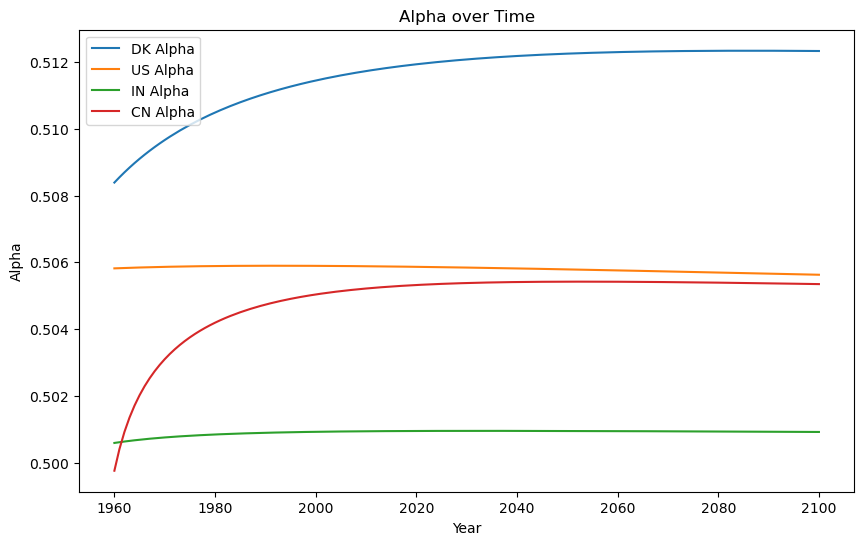

In [185]:
import numpy as np
import matplotlib.pyplot as plt

class AlphaCalculator:
    def __init__(self, data):
        self.data = data
        
    def calculate_alpha(self, Q_col, B_col, K_col, L_col):
        ln_Q_t = np.log(self.data[Q_col])
        ln_B_t = np.log(self.data[B_col])
        ln_KL_t = np.log(self.data[K_col] * self.data[L_col])
        
        alpha_value = (ln_Q_t - ln_KL_t) / (ln_B_t - ln_KL_t)
        return alpha_value
    
    def plot_alpha(self, alpha_col, label):
        plt.plot(self.data['t'], self.data[alpha_col], label=label)
        plt.xlabel('Year')
        plt.ylabel('Alpha')
        plt.legend()

# Assuming DataProject_Data is your DataFrame containing the data

# Create an instance of AlphaCalculator
alpha_calculator = AlphaCalculator(DataProject_Data)

# Calculate and plot alpha values for DK
DK_alpha_value = alpha_calculator.calculate_alpha('DK_Q_t', 'DK_B_t', 'DK_K_t', 'DK_L_t')
DataProject_Data['DK_alpha'] = DK_alpha_value

# Calculate and plot alpha values for US
US_alpha_value = alpha_calculator.calculate_alpha('US_Q_t', 'US_B_t', 'US_K_t', 'US_L_t')
DataProject_Data['US_alpha'] = US_alpha_value

# Calculate and plot alpha values for IN
IN_alpha_value = alpha_calculator.calculate_alpha('IN_Q_t', 'IN_B_t', 'IN_K_t', 'IN_L_t')
DataProject_Data['IN_alpha'] = IN_alpha_value

# Calculate and plot alpha values for CN
CN_alpha_value = alpha_calculator.calculate_alpha('CN_Q_t', 'CN_B_t', 'CN_K_t', 'CN_L_t')
DataProject_Data['CN_alpha'] = CN_alpha_value

# Plot alpha values over time for all countries
plt.figure(figsize=(10, 6))
alpha_calculator.plot_alpha('DK_alpha', 'DK Alpha')
alpha_calculator.plot_alpha('US_alpha', 'US Alpha')
alpha_calculator.plot_alpha('IN_alpha', 'IN Alpha')
alpha_calculator.plot_alpha('CN_alpha', 'CN Alpha')
plt.title('Alpha over Time')
plt.show()

In [186]:
# Assuming DataProject_Data is your DataFrame containing the data

# Define a condition for assigning values to B_new_t
condition = (DataProject_Data['t'] >= 2022) & (DataProject_Data['t'] <= 2100)

# Create a dictionary to map country codes to their corresponding 'B_t' columns
country_b_columns = {
    'DK': 'DK_B_t',
    'US': 'US_B_t',
    'IN': 'IN_B_t',
    'CN': 'CN_B_t'
}

# Iterate over the countries and assign values to B_new_t based on the condition
for country, b_column in country_b_columns.items():
    # Assign values to B_new_t for the current country based on the condition
    DataProject_Data.loc[~condition, f'{country}_B_new_t'] = DataProject_Data[b_column]
    DataProject_Data.loc[condition, f'{country}_B_new_t'] = DataProject_Data[b_column] * 1.2

import matplotlib.pyplot as plt

# Define countries and their corresponding B_t and B_new_t columns
countries = ['DK', 'US', 'IN', 'CN']
country_b_columns = {country: f'{country}_B_t' for country in countries}
country_b_new_columns = {country: f'{country}_B_new_t' for country in countries}

In [187]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Define a function to plot B_t and B_new_t for a selected country
def plot_country_b_values(country):
    plt.figure(figsize=(10, 6))
    plt.plot(DataProject_Data['t'], DataProject_Data[f'{country}_B_t'], label=f'{country} B_t')
    plt.plot(DataProject_Data['t'], DataProject_Data[f'{country}_B_new_t'], label=f'{country} B_new_t')
    plt.title(f'{country} B_t vs B_new_t')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Define countries and their corresponding B_t and B_new_t columns
countries = ['DK', 'US', 'IN', 'CN']

# Create dropdown menu for selecting a country
country_dropdown = widgets.Dropdown(options=countries, description='Country')

# Interact function to update plot based on dropdown selection
@interact(country=country_dropdown)
def update_plot(country):
    plot_country_b_values(country)

interactive(children=(Dropdown(description='Country', options=('DK', 'US', 'IN', 'CN'), value='DK'), Output())…

# NY Q_new_t


In [188]:
# Calculate Q_new_t for each country using the provided formula
for country in countries:
    B_new_col = f'{country}_B_new_t'  # Column containing B_new_t values for the current country
    alpha_col = f'{country}_alpha'     # Column containing alpha values for the current country
    K_col = f'{country}_K_t'           # Column containing K_t values for the current country
    L_col = f'{country}_L_t'           # Column containing L_t values for the current country
    
    # Calculate Q_new_t using the provided formula
    DataProject_Data[f'{country}_Q_new_t'] = (DataProject_Data[B_new_col] ** DataProject_Data[alpha_col]) * ((DataProject_Data[K_col] * DataProject_Data[L_col]) ** (1 - DataProject_Data[alpha_col]))

    # Calculate Q_t using the same formula with B_t instead of B_new_t
    B_col = f'{country}_B_t'  # Column containing B_t values for the current country
    DataProject_Data[f'{country}_Q_t'] = (DataProject_Data[B_col] ** DataProject_Data[alpha_col]) * ((DataProject_Data[K_col] * DataProject_Data[L_col]) ** (1 - DataProject_Data[alpha_col]))


In [189]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Define a function to plot Q_t and Q_new_t for a selected country
def plot_country_q_values(country):
    plt.figure(figsize=(10, 6))
    plt.plot(DataProject_Data['t'], DataProject_Data[f'{country}_Q_t'], label=f'{country} Q_t', color='blue')
    plt.plot(DataProject_Data['t'], DataProject_Data[f'{country}_Q_new_t'], label=f'{country} Q_new_t', color='orange')
    plt.title(f'{country} Q_t vs Q_new_t')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Define countries and their corresponding Q_t and Q_new_t columns
countries = ['DK', 'US', 'IN', 'CN']

# Create dropdown menu for selecting a country
country_dropdown = widgets.Dropdown(options=countries, description='Country')

# Interact function to update plot based on dropdown selection
@interact(country=country_dropdown)
def update_plot(country):
    plot_country_q_values(country)


interactive(children=(Dropdown(description='Country', options=('DK', 'US', 'IN', 'CN'), value='DK'), Output())…

# %_change

In [190]:
# Initialize variables to store the largest and smallest percentage change and their corresponding countries
max_change = float('-inf')
min_change = float('inf')
max_country = None
min_country = None

# Iterate over each country
for country in countries:
    # Calculate the percentage change from Q_t to Q_new_t at t=2100
    q_t_2100 = DataProject_Data.loc[DataProject_Data['t'] == 2100, f'{country}_Q_t'].values[0]
    q_new_t_2100 = DataProject_Data.loc[DataProject_Data['t'] == 2100, f'{country}_Q_new_t'].values[0]
    change_percent = ((q_new_t_2100 - q_t_2100) / q_t_2100) * 100
    
    # Update max and min change and their corresponding countries
    if change_percent > max_change:
        max_change = change_percent
        max_country = country
    if change_percent < min_change:
        min_change = change_percent
        min_country = country

# Output the country with the largest and smallest change
print(f"Country with the largest change: {max_country} ({max_change:.2f}%)")
print(f"Country with the smallest change: {min_country} ({min_change:.2f}%)")


Country with the largest change: DK (9.79%)
Country with the smallest change: IN (9.56%)


In [191]:
# Initialize variables to store the sum of percentage changes for q_t and q_new_t separately, and the count of countries
total_change_q_t = 0
total_change_q_new_t = 0
num_countries = len(countries)

# Iterate over each country
for country in countries:
    # Calculate the percentage change from Q_t to Q_new_t at t=2100
    q_t_2100 = DataProject_Data.loc[DataProject_Data['t'] == 2100, f'{country}_Q_t'].values[0]
    q_new_t_2100 = DataProject_Data.loc[DataProject_Data['t'] == 2100, f'{country}_Q_new_t'].values[0]
    
    # Calculate the percentage change for q_t and q_new_t separately
    change_percent_q_t = ((q_new_t_2100 - q_t_2100) / q_t_2100) * 100
    change_percent_q_new_t = ((q_new_t_2100 - q_t_2100) / q_t_2100) * 100
    
    # Add the percentage changes to the respective totals
    total_change_q_t += change_percent_q_t
    total_change_q_new_t += change_percent_q_new_t
    
    # Print the percentage changes for q_t and q_new_t for each country
    print(f"{country}:")
    print(f"   Percentage change for q_t: {change_percent_q_t:.2f}%")
    print(f"   Percentage change for q_new_t: {change_percent_q_new_t:.2f}%")

# Calculate the average percentage change for q_t and q_new_t separately
average_change_q_t = total_change_q_t / num_countries
average_change_q_new_t = total_change_q_new_t / num_countries

# Output the average percentage change for q_t and q_new_t separately
print(f"\nAverage percentage change for q_t: {average_change_q_t:.2f}%")
print(f"Average percentage change for q_new_t: {average_change_q_new_t:.2f}%")


DK:
   Percentage change for q_t: 9.79%
   Percentage change for q_new_t: 9.79%
US:
   Percentage change for q_t: 9.66%
   Percentage change for q_new_t: 9.66%
IN:
   Percentage change for q_t: 9.56%
   Percentage change for q_new_t: 9.56%
CN:
   Percentage change for q_t: 9.65%
   Percentage change for q_new_t: 9.65%

Average percentage change for q_t: 9.67%
Average percentage change for q_new_t: 9.67%


# New B_t per capita

# Dette er alle landekoderne ovenover bare kortere

In [192]:
def calculate_Q_t_per_worker(country_prefix):
    Q_t_values = DataProject_Data[f'{country_prefix}_Q_t']
    L_t_values = DataProject_Data[f'{country_prefix}_L_t']
    Q_t_per_worker_values = [Q_t / L_t if L_t != 0 else None for Q_t, L_t in zip(Q_t_values, L_t_values)]
    return Q_t_per_worker_values

# Calculate Q_t_per_worker values for all periods for Denmark
DK_Q_t_per_worker_values = calculate_Q_t_per_worker('DK')

# Calculate Q_t_per_worker values for all periods for India
IN_Q_t_per_worker_values = calculate_Q_t_per_worker('IN')

# Calculate Q_t_per_worker values for all periods for China
CN_Q_t_per_worker_values = calculate_Q_t_per_worker('CN')

# Calculate Q_t_per_worker values for all periods for the United States
US_Q_t_per_worker_values = calculate_Q_t_per_worker('US')

# Print Q_t_per_worker values for Denmark for years 1960 and 2100
print("Denmark:")
print(f"   Year 1960: Q_t_per_worker = {DK_Q_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: Q_t_per_worker = {DK_Q_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print Q_t_per_worker values for India for years 1960 and 2100
print("India:")
print(f"   Year 1960: Q_t_per_worker = {IN_Q_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: Q_t_per_worker = {IN_Q_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print Q_t_per_worker values for China for years 1960 and 2100
print("China:")
print(f"   Year 1960: Q_t_per_worker = {CN_Q_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: Q_t_per_worker = {CN_Q_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print Q_t_per_worker values for the United States for years 1960 and 2100
print("United States:")
print(f"   Year 1960: Q_t_per_worker = {US_Q_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: Q_t_per_worker = {US_Q_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")


Denmark:
   Year 1960: Q_t_per_worker = 35895.82542312678
   Year 2100: Q_t_per_worker = 449279.16293012083
India:
   Year 1960: Q_t_per_worker = 2495.202776758817
   Year 2100: Q_t_per_worker = 39138.36414249067
China:
   Year 1960: Q_t_per_worker = 2333.04323594321
   Year 2100: Q_t_per_worker = 90356.99980224208
United States:
   Year 1960: Q_t_per_worker = 49479.86764930954
   Year 2100: Q_t_per_worker = 424458.1418190932


Import your data, either through an API or manually, and load it. 

In [193]:
def calculate_Q_new_t_per_worker(country_prefix):
    Q_new_t_values = DataProject_Data[f'{country_prefix}_Q_new_t']
    L_t_values = DataProject_Data[f'{country_prefix}_L_t']
    Q_new_t_per_worker_values = [Q_new_t / L_t if L_t != 0 else None for Q_new_t, L_t in zip(Q_new_t_values, L_t_values)]
    return Q_new_t_per_worker_values

# Calculate Q_new_t_per_worker values for all periods for Denmark
DK_Q_new_t_per_worker_values = calculate_Q_new_t_per_worker('DK')

# Calculate Q_new_t_per_worker values for all periods for India
IN_Q_new_t_per_worker_values = calculate_Q_new_t_per_worker('IN')

# Calculate Q_new_t_per_worker values for all periods for China
CN_Q_new_t_per_worker_values = calculate_Q_new_t_per_worker('CN')

# Calculate Q_new_t_per_worker values for all periods for the United States
US_Q_new_t_per_worker_values = calculate_Q_new_t_per_worker('US')

# Print Q_new_t_per_worker values for Denmark for years 1960 and 2100
print("Denmark:")
print(f"   Year 1960: Q_new_t_per_worker = {DK_Q_new_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: Q_new_t_per_worker = {DK_Q_new_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print Q_new_t_per_worker values for India for years 1960 and 2100
print("India:")
print(f"   Year 1960: Q_new_t_per_worker = {IN_Q_new_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: Q_new_t_per_worker = {IN_Q_new_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print Q_new_t_per_worker values for China for years 1960 and 2100
print("China:")
print(f"   Year 1960: Q_new_t_per_worker = {CN_Q_new_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: Q_new_t_per_worker = {CN_Q_new_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print Q_new_t_per_worker values for the United States for years 1960 and 2100
print("United States:")
print(f"   Year 1960: Q_new_t_per_worker = {US_Q_new_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: Q_new_t_per_worker = {US_Q_new_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")


Denmark:
   Year 1960: Q_new_t_per_worker = 35895.82542312678
   Year 2100: Q_new_t_per_worker = 493268.48595728585
India:
   Year 1960: Q_new_t_per_worker = 2495.202776758817
   Year 2100: Q_new_t_per_worker = 42881.121967045525
China:
   Year 1960: Q_new_t_per_worker = 2333.04323594321
   Year 2100: Q_new_t_per_worker = 99077.717724445
United States:
   Year 1960: Q_new_t_per_worker = 49479.86764930954
   Year 2100: Q_new_t_per_worker = 465448.0768873987


In [194]:
def calculate_B_t_per_worker(country_prefix):
    B_t_values = DataProject_Data[f'{country_prefix}_B_t']
    L_t_values = DataProject_Data[f'{country_prefix}_L_t']
    B_t_per_worker_values = [B_t / L_t if L_t != 0 else None for B_t, L_t in zip(B_t_values, L_t_values)]
    return B_t_per_worker_values

# Calculate B_t_per_worker values for all periods for Denmark
DK_B_t_per_worker_values = calculate_B_t_per_worker('DK')

# Calculate B_t_per_worker values for all periods for India
IN_B_t_per_worker_values = calculate_B_t_per_worker('IN')

# Calculate B_t_per_worker values for all periods for China
CN_B_t_per_worker_values = calculate_B_t_per_worker('CN')

# Calculate B_t_per_worker values for all periods for the United States
US_B_t_per_worker_values = calculate_B_t_per_worker('US')

# Print B_t_per_worker values for Denmark for years 1960 and 2100
print("Denmark:")
print(f"   Year 1960: B_t_per_worker = {DK_B_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: B_t_per_worker = {DK_B_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print B_t_per_worker values for India for years 1960 and 2100
print("India:")
print(f"   Year 1960: B_t_per_worker = {IN_B_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: B_t_per_worker = {IN_B_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print B_t_per_worker values for China for years 1960 and 2100
print("China:")
print(f"   Year 1960: B_t_per_worker = {CN_B_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: B_t_per_worker = {CN_B_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print B_t_per_worker values for the United States for years 1960 and 2100
print("United States:")
print(f"   Year 1960: B_t_per_worker = {US_B_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: B_t_per_worker = {US_B_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

Denmark:
   Year 1960: B_t_per_worker = 0.008146827614293969
   Year 2100: B_t_per_worker = 0.029474218811646725
India:
   Year 1960: B_t_per_worker = 6.163247193303845e-06
   Year 2100: B_t_per_worker = 3.410139237307727e-06
China:
   Year 1960: B_t_per_worker = 8.358707976507962e-06
   Year 2100: B_t_per_worker = 1.1325779269641523e-05
United States:
   Year 1960: B_t_per_worker = 0.00026106241334533306
   Year 2100: B_t_per_worker = 0.0003167130807704555


In [195]:
def calculate_B_new_t_per_worker(country_prefix):
    B_new_t_values = DataProject_Data[f'{country_prefix}_B_new_t']
    L_t_values = DataProject_Data[f'{country_prefix}_L_t']
    B_new_t_per_worker_values = [B_new_t / L_t if L_t != 0 else None for B_new_t, L_t in zip(B_new_t_values, L_t_values)]
    return B_new_t_per_worker_values

# Calculate B_new_t_per_worker values for all periods for Denmark
DK_B_new_t_per_worker_values = calculate_B_new_t_per_worker('DK')

# Calculate B_new_t_per_worker values for all periods for India
IN_B_new_t_per_worker_values = calculate_B_new_t_per_worker('IN')

# Calculate B_new_t_per_worker values for all periods for China
CN_B_new_t_per_worker_values = calculate_B_new_t_per_worker('CN')

# Calculate B_new_t_per_worker values for all periods for the United States
US_B_new_t_per_worker_values = calculate_B_new_t_per_worker('US')

# Print B_new_t_per_worker values for Denmark for years 1960 and 2100
print("Denmark:")
print(f"   Year 1960: B_new_t_per_worker = {DK_B_new_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: B_new_t_per_worker = {DK_B_new_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print B_new_t_per_worker values for India for years 1960 and 2100
print("India:")
print(f"   Year 1960: B_new_t_per_worker = {IN_B_new_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: B_new_t_per_worker = {IN_B_new_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print B_new_t_per_worker values for China for years 1960 and 2100
print("China:")
print(f"   Year 1960: B_new_t_per_worker = {CN_B_new_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: B_new_t_per_worker = {CN_B_new_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print B_new_t_per_worker values for the United States for years 1960 and 2100
print("United States:")
print(f"   Year 1960: B_new_t_per_worker = {US_B_new_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: B_new_t_per_worker = {US_B_new_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

Denmark:
   Year 1960: B_new_t_per_worker = 0.008146827614293969
   Year 2100: B_new_t_per_worker = 0.035369062573976075
India:
   Year 1960: B_new_t_per_worker = 6.163247193303845e-06
   Year 2100: B_new_t_per_worker = 4.092167084769272e-06
China:
   Year 1960: B_new_t_per_worker = 8.358707976507962e-06
   Year 2100: B_new_t_per_worker = 1.3590935123569828e-05
United States:
   Year 1960: B_new_t_per_worker = 0.00026106241334533306
   Year 2100: B_new_t_per_worker = 0.0003800556969245467


In [196]:
def calculate_K_t_per_worker(country_prefix):
    K_t_values = DataProject_Data[f'{country_prefix}_K_t']
    L_t_values = DataProject_Data[f'{country_prefix}_L_t']
    K_t_per_worker_values = [K_t / L_t if L_t != 0 else None for K_t, L_t in zip(K_t_values, L_t_values)]
    return K_t_per_worker_values

# Calculate K_t_per_worker values for all periods for Denmark
DK_K_t_per_worker_values = calculate_K_t_per_worker('DK')

# Calculate K_t_per_worker values for all periods for India
IN_K_t_per_worker_values = calculate_K_t_per_worker('IN')

# Calculate K_t_per_worker values for all periods for China
CN_K_t_per_worker_values = calculate_K_t_per_worker('CN')

# Calculate K_t_per_worker values for all periods for the United States
US_K_t_per_worker_values = calculate_K_t_per_worker('US')

# Print K_t_per_worker values for Denmark for years 1960 and 2100
print("Denmark:")
print(f"   Year 1960: K_t_per_worker = {DK_K_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: K_t_per_worker = {DK_K_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print K_t_per_worker values for India for years 1960 and 2100
print("India:")
print(f"   Year 1960: K_t_per_worker = {IN_K_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: K_t_per_worker = {IN_K_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print K_t_per_worker values for China for years 1960 and 2100
print("China:")
print(f"   Year 1960: K_t_per_worker = {CN_K_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: K_t_per_worker = {CN_K_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

# Print K_t_per_worker values for the United States for years 1960 and 2100
print("United States:")
print(f"   Year 1960: K_t_per_worker = {US_K_t_per_worker_values[1960 - DataProject_Data['t'].min()]}")
print(f"   Year 2100: K_t_per_worker = {US_K_t_per_worker_values[2100 - DataProject_Data['t'].min()]}")

Denmark:
   Year 1960: K_t_per_worker = 126264.17131545798
   Year 2100: K_t_per_worker = 3368709.3561237073
India:
   Year 1960: K_t_per_worker = 5902.173440386766
   Year 2100: K_t_per_worker = 187705.76970201323
China:
   Year 1960: K_t_per_worker = 2161.589150594368
   Year 2100: K_t_per_worker = 672842.2889100094
United States:
   Year 1960: K_t_per_worker = 207070.6543996965
   Year 2100: K_t_per_worker = 1952313.508658594


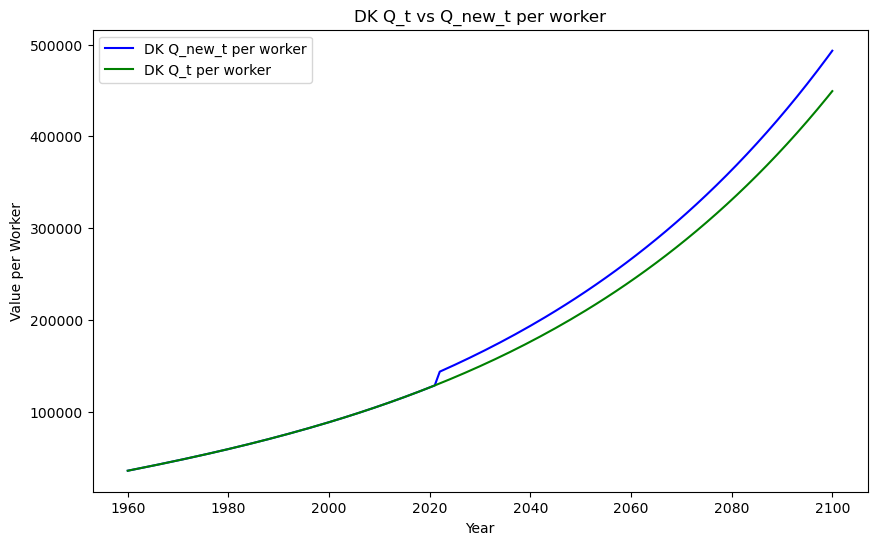

In [197]:
import matplotlib.pyplot as plt

# Plot DK_Q_new_t_per_worker_values and DK_Q_t_per_worker_values
plt.figure(figsize=(10, 6))
plt.plot(DataProject_Data['t'], DK_Q_new_t_per_worker_values, label='DK Q_new_t per worker', color='blue')
plt.plot(DataProject_Data['t'], DK_Q_t_per_worker_values, label='DK Q_t per worker', color='green')
plt.title('DK Q_t vs Q_new_t per worker')
plt.xlabel('Year')
plt.ylabel('Value per Worker')
plt.legend()
plt.show()


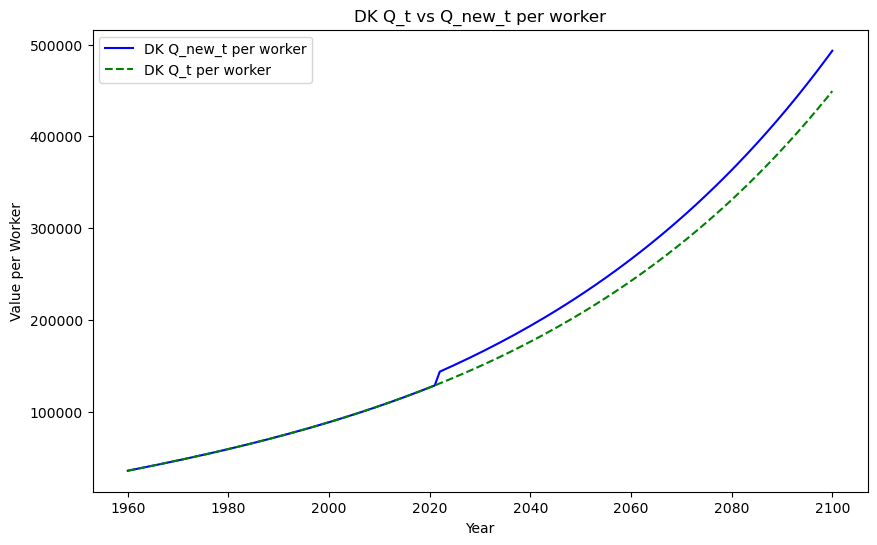

In [198]:
import matplotlib.pyplot as plt

# Plot DK_Q_new_t_per_worker_values and DK_Q_t_per_worker_values
plt.figure(figsize=(10, 6))
plt.plot(DataProject_Data['t'], DK_Q_new_t_per_worker_values, label='DK Q_new_t per worker', linestyle='-', color='blue')
plt.plot(DataProject_Data['t'], DK_Q_t_per_worker_values, label='DK Q_t per worker', linestyle='--', color='green')
plt.title('DK Q_t vs Q_new_t per worker')
plt.xlabel('Year')
plt.ylabel('Value per Worker')
plt.legend()
plt.show()


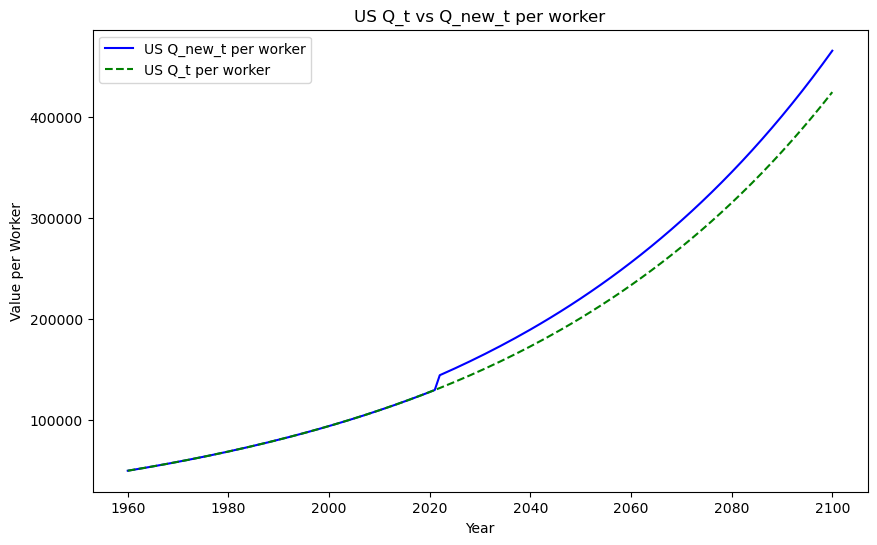

In [199]:
import matplotlib.pyplot as plt

# Plot US_Q_new_t_per_worker_values and US_Q_t_per_worker_values
plt.figure(figsize=(10, 6))
plt.plot(DataProject_Data['t'], US_Q_new_t_per_worker_values, label='US Q_new_t per worker', linestyle='-', color='blue')
plt.plot(DataProject_Data['t'], US_Q_t_per_worker_values, label='US Q_t per worker', linestyle='--', color='green')
plt.title('US Q_t vs Q_new_t per worker')
plt.xlabel('Year')
plt.ylabel('Value per Worker')
plt.legend()
plt.show()


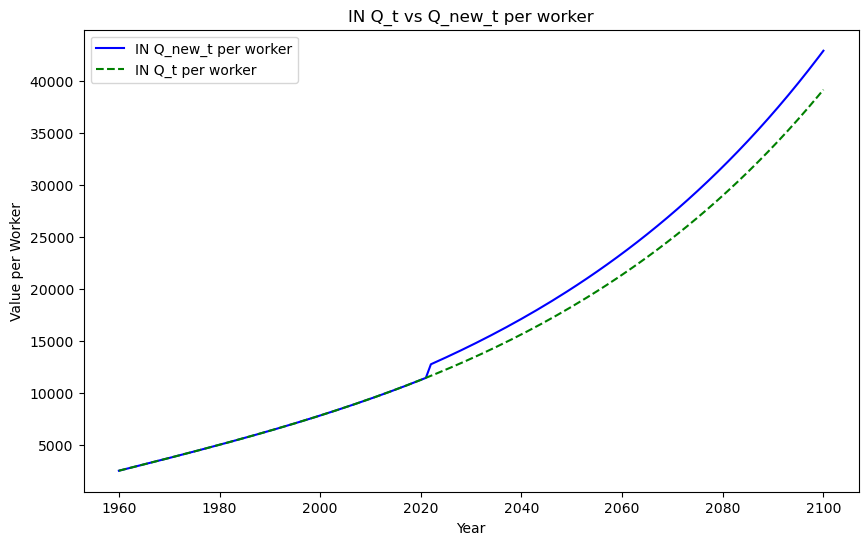

In [200]:
import matplotlib.pyplot as plt

# Plot IN_Q_new_t_per_worker_values and IN_Q_t_per_worker_values
plt.figure(figsize=(10, 6))
plt.plot(DataProject_Data['t'], IN_Q_new_t_per_worker_values, label='IN Q_new_t per worker', linestyle='-', color='blue')
plt.plot(DataProject_Data['t'], IN_Q_t_per_worker_values, label='IN Q_t per worker', linestyle='--', color='green')
plt.title('IN Q_t vs Q_new_t per worker')
plt.xlabel('Year')
plt.ylabel('Value per Worker')
plt.legend()
plt.show()


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.